In [11]:
from matplotlib import pyplot as plt
import numpy as np
import mogreps
import netCDF4
import pandas as pd

In [12]:
import os
os.getcwd()

'/home/paula/Desktop/Metoffice/miniproject'

In [14]:
# read in netCDF
data_set = netCDF4.Dataset('ensemble_means_201401.nc')

In [36]:
data_set.variables.keys()

temperature = data_set.variables['Temperature']
pressure = data_set.variables['Pressure']
humidity = data_set.variables['Humidity']
windspeed = data_set.variables['Wind Speed']

humidity_train = np.array(humidity[0:20])
humidity_test = np.array(humidity[21:-1])
pressure_train =  np.array(pressure[0:20])
pressure_test = np.array(pressure[21:-1])
wind_train =  np.array(windspeed[0:20])
wind_test = np.array(windspeed[21:-1])

temperature_train = temperature[0:20]
temperature_test = temperature[21:-1]


In [31]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# # Load the dataset.
# traindata=pd.read_table('traindata.txt',usecols=[1,2,3,4,5,6,7,8])
# testdata=pd.read_table('testdata.txt',usecols=[1,2,3,4,5,6,7,8])

In [16]:
#traindata.describe()

In [20]:
traindata.hist(figsize=(18,6))
plt.show()

AttributeError: NetCDF: Attribute not found

In [38]:
# # Split the data into training/testing sets.
# humidity_train = np.array(traindata['Xdes'])
# humidity_test = np.array(testdata['Xdes'])
# pressure_train =  np.array(traindata['Ydes'])
# pressure_test = np.array(testdata['Ydes'])
# wind_train =  np.array(traindata['Sdes'])
# wind_test = np.array(testdata['Sdes'])


In [18]:
df = pd.DataFrame(np.stack((humidity_train,pressure_train,wind_train, temperature_train),axis=1))

(array([2., 3., 3., 1., 3., 1., 3., 2., 1., 1.]),
 array([239.828125, 241.753125, 243.678125, 245.603125, 247.528125,
        249.453125, 251.378125, 253.303125, 255.228125, 257.153125,
        259.078125]),
 <a list of 10 Patch objects>)

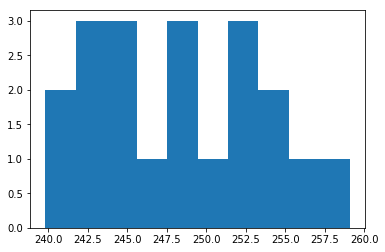

In [26]:
plt.hist(temperature_train)

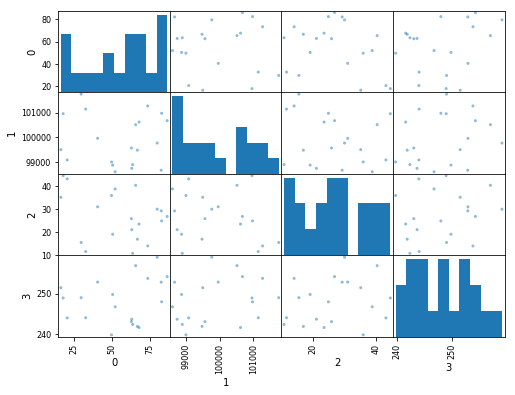

In [19]:
# scatter plot matrix
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(8,6))
plt.show()

In [44]:
# # Split the targets into training/testing sets.
# temperature_train = np.array(traindata['Y'])
# temperature_test = np.array(testdata['Y'])


predictors_train=np.stack((humidity_train,pressure_train,wind_train),axis=1)
predictors_test=np.stack((humidity_test,pressure_test,wind_test),axis=1)

# Create linear regression object
regr = linear_model.LinearRegression()



# Train the model using the training sets
regr.fit(predictors_train,temperature_train)

# Make predictions using the testing set
temperature_pred = regr.predict(predictors_test)

# The coefficients.
print('Coefficients: \n', regr.coef_)
# The mean squared error.
print("Mean squared error: %.2f"
      % mean_squared_error(temperature_test, temperature_pred))
# Explained variance score: 1 is perfect prediction.
print('Variance score: %.2f' % r2_score(temperature_test, temperature_pred))



Coefficients: 
 [0.09332149 0.0021071  0.22018209]
Mean squared error: 15.94
Variance score: 0.44


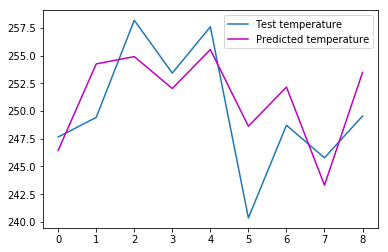

In [45]:
plt.plot(temperature_test,label='Test temperature')
plt.plot(temperature_pred,'m',label='Predicted temperature')
plt.legend()

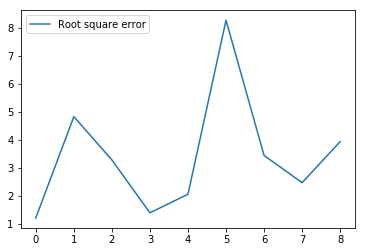

In [46]:
plt.plot(np.sqrt((temperature_test-temperature_pred)**2),label='Root square error')
plt.legend()

Text(0,0.5,'Predicted temperature')

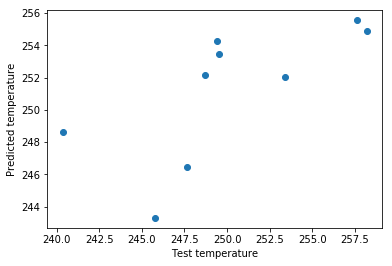

In [47]:
plt.scatter(temperature_test,temperature_pred)
plt.xlabel('Test temperature')
plt.ylabel('Predicted temperature')
#plt.legend()